### Locally Weighted Regression

1)Read and Normalize the Dataset

2)Generate W for every query point!

3)No training involved, directly make predictions using closed form solution we derived!

4)Find the best Value of Tau(Bandwidth Parameter)[Cross Validation]

### 1. Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use("seaborn")

C:\Users\AS\AppData\Local\Temp\ipykernel_10448\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
dfx = pd.read_csv("Datasets\weightedX.csv")
dfy = pd.read_csv("Datasets\weightedY.csv")

In [4]:
X = dfx.values
Y = dfy.values

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


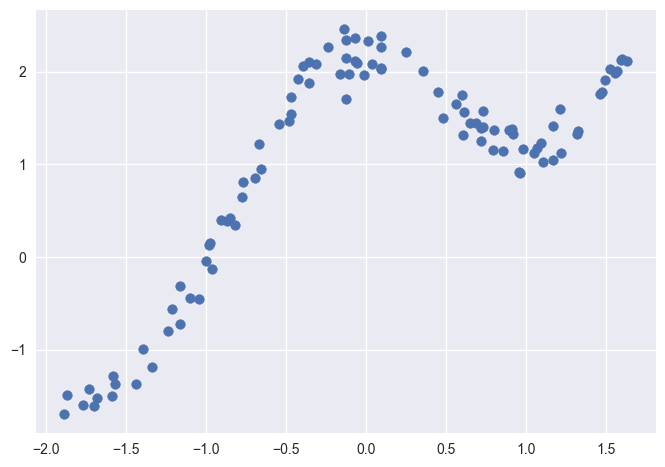

In [6]:
# Normalize Data
u = X.mean()
std = X.std()

X = (X - u) / std

plt.scatter(X, Y)
plt.show()

### 2. Find out W(m x m) diagonal matrix

In [7]:
# a * b --> a, b --> matrices --> matrix mutiplication
# a * b --> a, b --> arrays --> Element wise multiplication

In [8]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))

    for i in range(M):
        xi = X[i]
        x = query_point
        W[i, i] = np.exp(np.dot((xi - x) , (xi - x).T) / (-2 * tau * tau))
    
    return W

In [9]:
X = np.mat(X)
Y = np.mat(Y)

M = X.shape[0]

W = getW(-1, X, 0.5)
# Tau value defines that how many near should after the value of loss function
# Higher the Tau more it will become a linear regression model 

print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


### 3. Make Predictions

In [16]:
def predict(X, Y, query_x, tau):
    ones = np.ones((M, 1))
    X_ = np.hstack((X, ones))

    qx = np.mat([query_x, 1])

    W = getW(qx, X_, tau)

    # theta = '(X'W X)inv * X'WY'

    theta = np.linalg.pinv(X_.T * (W * X_)) * (X_.T * (W * Y))

    # print(theta.shape)

    pred = np.dot(qx, theta)
    return theta, pred

In [17]:
theta, pred = predict(X, Y, 1.0, 1.0)

In [18]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [19]:
print(pred)

[[1.59417694]]


### 4. Visualise Predictions, Analyse the Effect of Tau

In [22]:
def plotPrediction(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []

    for xq in X_test:
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred[0][0])
    
    Y_test = np.array(Y_test)

    Xo = np.array(X)
    Yo = np.array(Y)

    plt.title(f"LOWESS with tau as {tau}")
    plt.scatter(Xo, Yo)
    plt.scatter(X_test, Y_test, color = 'red')
    plt.show()

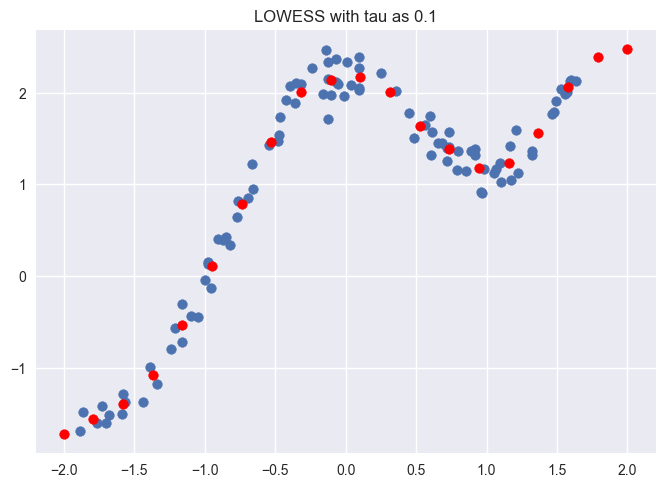

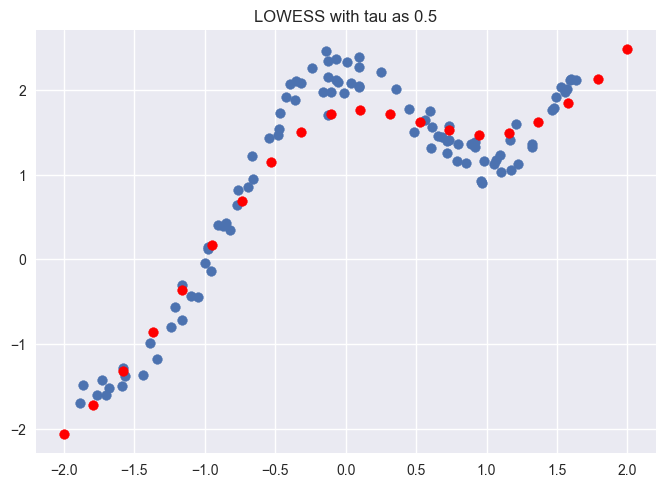

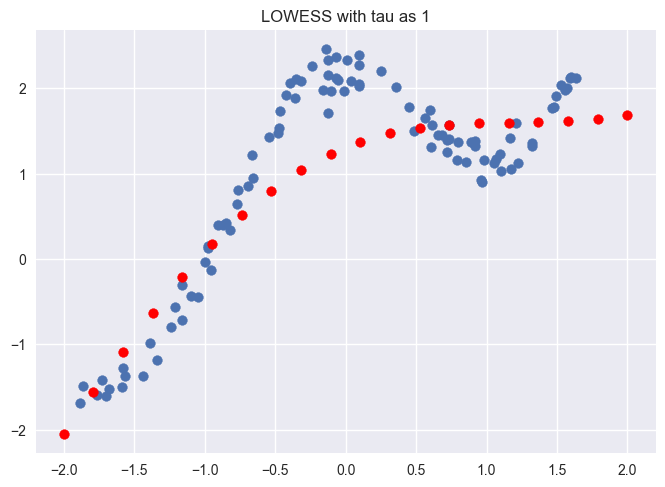

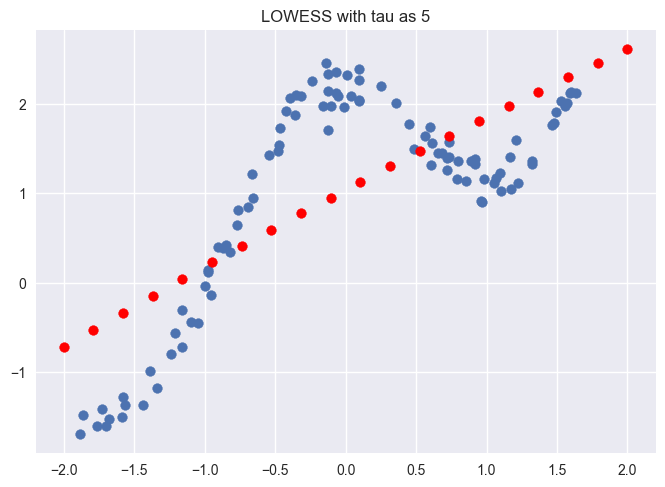

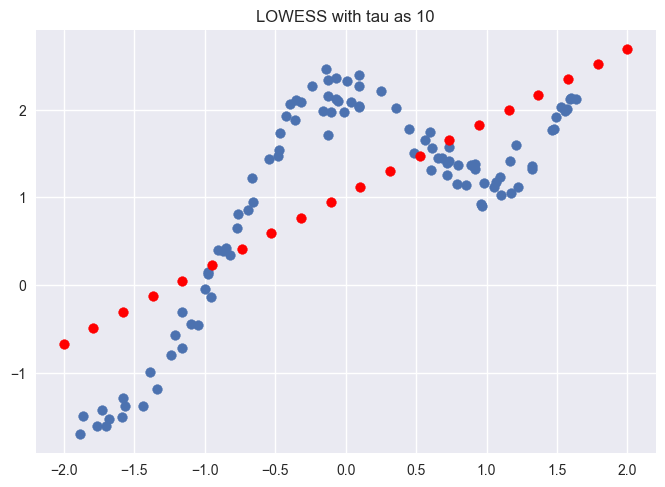

In [23]:
taus = [0.1, 0.5, 1, 5, 10]

for t in taus:
    plotPrediction(t)